Importing libraries

In [1]:
import numpy as np
import pandas as pd

Reading CSV from Github

In [2]:
vehicles = pd.read_csv("https://raw.githubusercontent.com/Ali7109/3401Project/trimmed-dataset/src/vehicles_trimmed.csv")
vehicles_backup = vehicles

In [3]:
vehicles[::-1]

,id,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,VIN,drive,size,type,paint_color,county,state,lat,long,posting_date
426879,7301591129,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,...,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600
426878,7301591140,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,...,58ABK1GG4JU103853,fwd,NaN,sedan,silver,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426877,7301591147,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,...,1GYFZFR46LF088296,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426876,7301591187,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,...,7JR102FKXLG042696,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426875,7301591192,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,...,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,7210384030,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
3,7222270760,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
2,7221797935,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
1,7218891961,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN


Keeping the top 40 car models to avoid irregular naming/spelling and formatting errors. 

In [4]:
# at about the top 40 models the naming stops being regular
# sort models by top
model_count = vehicles['model'].value_counts()
print(model_count[:40])

model
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
accord              2969
wrangler            2848
civic               2799
altima              2779
escape              2746
2500                2687
tacoma              2582
explorer            2499
grand cherokee      2489
corolla             2241
mustang             2225
fusion              1979
equinox             1972
cr-v                1930
focus               1832
malibu              1764
tahoe               1729
charger             1719
corvette            1711
rav4                1701
sonata              1686
impala              1682
sierra 1500         1658
grand caravan       1601
cruze               1559
outback             1551
silverado 2500hd    1545
f-250               1529
elantra             1498
odyssey             1494
3500                1491
edge                1471
prius               1435
tundra              1425
jetta              

In [5]:
# Take the top 40 models and put it into a list to be used for comparison
sorted_models = dict(model_count).keys()
sorted_models = list(sorted_models)
sorted_models = sorted_models[:40]
print(sorted_models)

['f-150', 'silverado 1500', '1500', 'camry', 'silverado', 'accord', 'wrangler', 'civic', 'altima', 'escape', '2500', 'tacoma', 'explorer', 'grand cherokee', 'corolla', 'mustang', 'fusion', 'equinox', 'cr-v', 'focus', 'malibu', 'tahoe', 'charger', 'corvette', 'rav4', 'sonata', 'impala', 'sierra 1500', 'grand caravan', 'cruze', 'outback', 'silverado 2500hd', 'f-250', 'elantra', 'odyssey', '3500', 'edge', 'prius', 'tundra', 'jetta']


In [6]:
# Goes through the entire model column and check if that value is in the top40 list from above, if it is keep it, else we replace the value with null
# so it can be dropped later
vehicles['model'] = vehicles['model'].apply(lambda carModel : carModel if str(carModel) in sorted_models else np.nan)

Remove un-needed columns

In [7]:
vehicles = vehicles.drop(['id','region_url', 'condition', 'VIN', 'drive', 'size', 'county', 'posting_date'], axis=1)

In [8]:
# see how much data is missing and then just drop it.
print(vehicles.isna().sum() / vehicles.shape[0] * 100)
vehicles = vehicles.dropna()

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model           78.511994
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
paint_color     30.501078
state            0.000000
lat              1.534155
long             1.534155
dtype: float64


In [9]:
vehicles.shape

(37075, 15)

In [10]:
# see what the data looks like at this point
vehicles.sample(10)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,lat,long
404829,kennewick-pasco-richland,7500,2012.0,ford,mustang,6 cylinders,gas,97500.0,salvage,manual,coupe,blue,wa,46.321300,-119.369400
328731,erie,17995,2012.0,ford,mustang,8 cylinders,gas,97316.0,clean,manual,coupe,black,pa,40.833834,-81.338867
407650,seattle-tacoma,29140,2017.0,honda,odyssey,6 cylinders,gas,38127.0,clean,automatic,mini-van,grey,wa,45.487755,-122.813411
76994,denver,24999,2019.0,subaru,outback,4 cylinders,gas,22490.0,clean,automatic,wagon,red,co,39.731855,-105.178540
116933,tampa bay area,15995,2017.0,chevrolet,equinox,4 cylinders,gas,91297.0,clean,automatic,SUV,black,fl,28.763821,-81.282651
168682,wichita,6789,2010.0,chevrolet,equinox,6 cylinders,gas,194000.0,clean,automatic,wagon,brown,ks,37.614672,-97.334876
335128,philadelphia,11800,2015.0,honda,civic,4 cylinders,gas,63777.0,clean,automatic,sedan,silver,pa,40.154700,-74.990400
339845,scranton / wilkes-barre,17000,2014.0,chevrolet,silverado 1500,8 cylinders,gas,162000.0,clean,automatic,truck,white,pa,41.540774,-75.539335
329158,harrisburg,24500,2007.0,ram,2500,6 cylinders,diesel,157000.0,clean,automatic,truck,brown,pa,40.122200,-76.773700
113833,south florida,8991,2010.0,toyota,tacoma,4 cylinders,gas,213132.0,clean,automatic,pickup,silver,fl,26.093111,-80.142651


### Remove any "extreme values" from the dataset
* i.e. any 'free cars' (ones that are listed as free but would say call for price, etc.)
* and just any cars that somehow hit a million miles

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Remove all "free" cars
vehicles= vehicles[vehicles['price'] != 0.0]

In [13]:
# Remove the extremes from the prices (remove the $1 cars, and some of the cars that go over a million)
lowerPricePercentile = np.percentile(vehicles['price'], 3)
upperPricePercentile = np.percentile(vehicles['price'], 99)
print(lowerPricePercentile, upperPricePercentile)
vehicles = vehicles[vehicles['price'].between(lowerPricePercentile, upperPricePercentile)]

1200.0 56999.0


In [14]:
# remove extremes from the odometer (really low mileage (maybe typo or just doesn't care), and the million mile cars)
lowerOdometerPercentile = np.percentile(vehicles['odometer'], 2)
upperUpperPercentile = np.percentile(vehicles['odometer'], 99)
print(lowerOdometerPercentile, upperUpperPercentile)
vehicles = vehicles[vehicles['odometer'].between(lowerOdometerPercentile, upperUpperPercentile)]

7889.0 280000.0


In [15]:
# final shape
vehicles.shape

(32624, 15)

## Plotting what we have now

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >]], dtype=object)

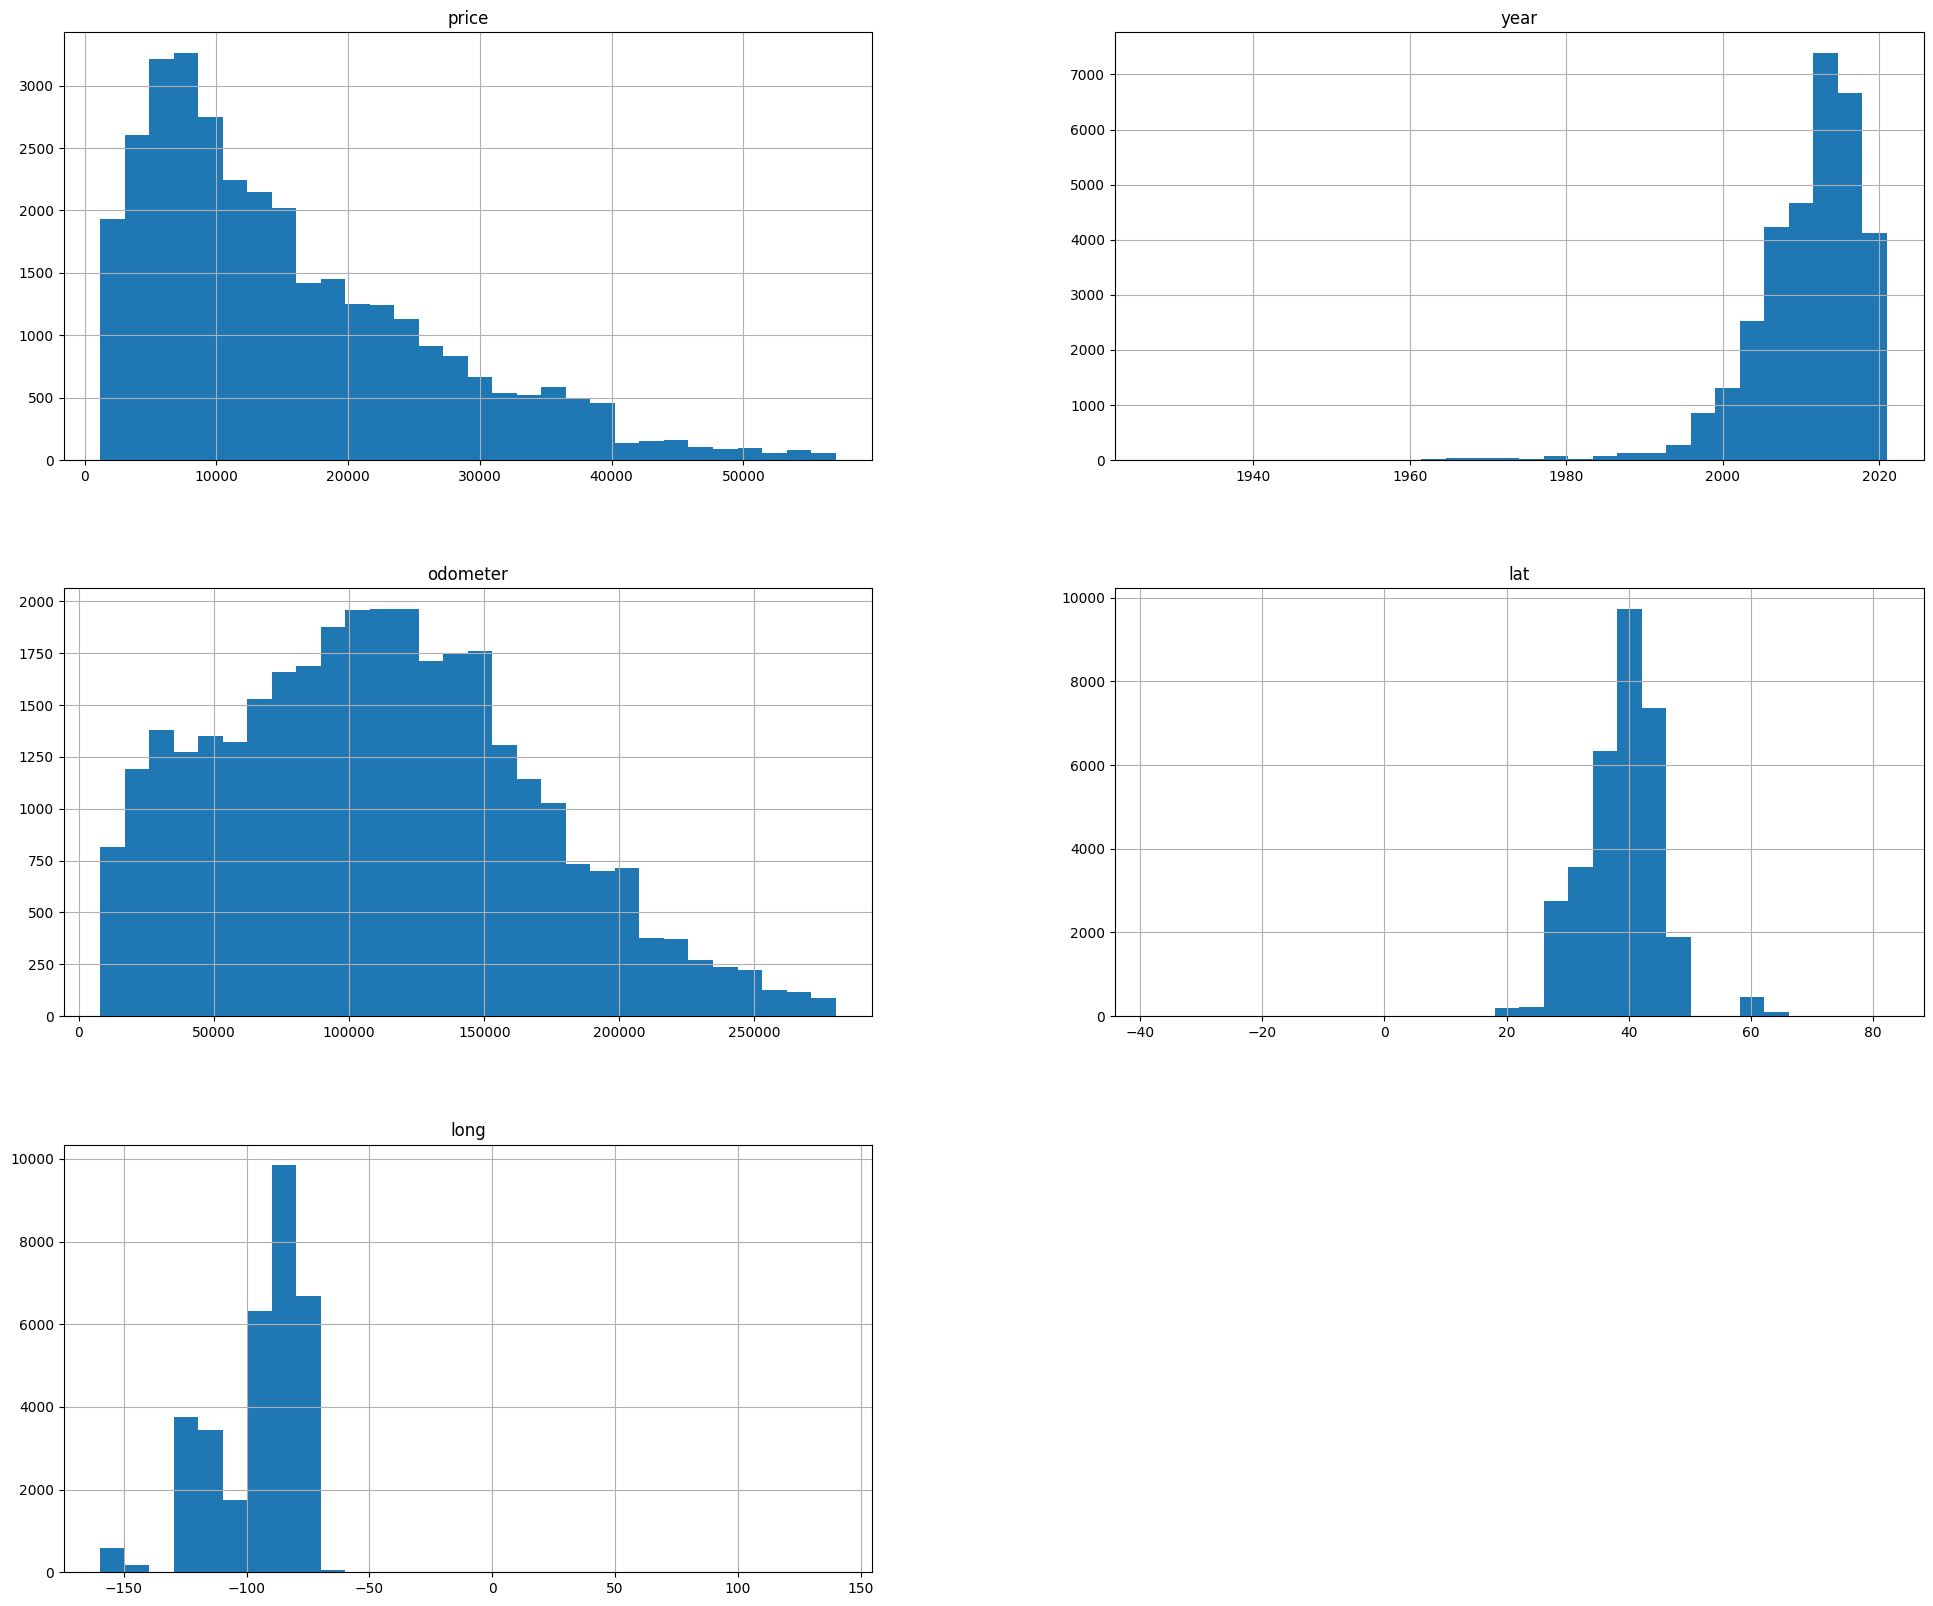

In [16]:
vehicles.hist(figsize=(24,20), bins=30)

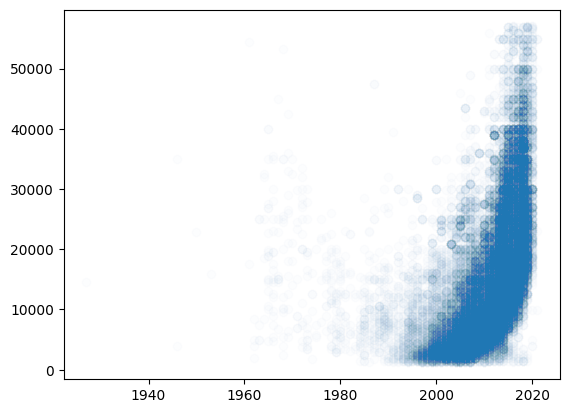

In [17]:
plt.scatter(vehicles['year'], vehicles['price'], alpha=0.01)

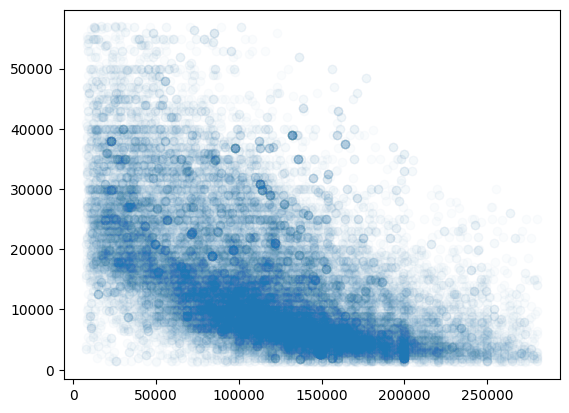

In [18]:
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.02)

### Splitting and Training Data

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [20]:
# Create the cat and num columns
# Get a list of column names from the DataFrame that are of numerical data types.
# Get a list of column names from the DataFrame that are not of numerical data types.

num_cols = vehicles.select_dtypes(include='number').columns.to_list()
cat_cols = vehicles.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove('price')

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                   remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'odometer', 'lat', 'long']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['region', 'manufacturer', 'model',
                                  'cylinders', 'fuel', 'title_status',
                                  'transmission', 'type', 'paint_color',
                                  'state'])])

In [21]:
num_cols

['year', 'odometer', 'lat', 'long']

In [22]:
cat_cols

['region',
 'manufacturer',
 'model',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'type',
 'paint_color',
 'state']

In [24]:
# Apply the preprocessing pipeline on the dataset
vehicles_prepared = preprocessing.fit_transform(vehicles)


In [25]:

# # Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
#vehicles_prepared.shape
vehicles_prepared = pd.DataFrame(data=vehicles_prepared, columns=feature_names)
vehicles_prepared.shape

(32624, 555)

In [26]:
vehicles_prepared.columns

Index(['num__year', 'num__odometer', 'num__lat', 'num__long',
       'cat__region_SF bay area', 'cat__region_abilene',
       'cat__region_akron / canton', 'cat__region_albany',
       'cat__region_albuquerque', 'cat__region_altoona-johnstown',
       ...
       'cat__state_tn', 'cat__state_tx', 'cat__state_ut', 'cat__state_va',
       'cat__state_vt', 'cat__state_wa', 'cat__state_wi', 'cat__state_wv',
       'cat__state_wy', 'remainder__price'],
      dtype='object', length=555)

# TRAINING

## Splitting

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = vehicles_prepared.drop(["remainder__price"], axis=1)
y = vehicles_prepared['remainder__price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(26099, 554) (26099,) (6525, 554) (6525,)


## Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])
# # lr_model.fit(X_train,y_train)


LinearRegression()

In [31]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

1.2836634297072562e+29

## Random Forest Regression

In [32]:

from sklearn.ensemble import RandomForestRegressor

#Initalization
forest_model = RandomForestRegressor()

#Training
forest_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])

RandomForestRegressor()

In [33]:
# Predict prices using the trained Random Forest model
predicted_prices_forest = forest_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Random Forest model
mse_forest = mean_squared_error(y_test, predicted_prices_forest)

# Calculate R-squared for the Random Forest model
r2_forest = r2_score(y_test, predicted_prices_forest)

print(f"Random Forest - Mean Squared Error: {mse_forest}")
print(f"Random Forest - R-squared: {r2_forest}")


Random Forest - Mean Squared Error: 12434150.117128592
Random Forest - R-squared: 0.8981558399348687


## Gradient Boosting Regression

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

#Initalization
gradient_boosting_model = GradientBoostingRegressor()

#Training 
gradient_boosting_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])

GradientBoostingRegressor()

In [35]:
# Predict prices using the trained Gradient Boosting model
predicted_prices_gradient_boosting = gradient_boosting_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Gradient Boosting model
mse_gradient_boosting = mean_squared_error(y_test, predicted_prices_gradient_boosting)

# Calculate R-squared for the Gradient Boosting model
r2_gradient_boosting = r2_score(y_test, predicted_prices_gradient_boosting)

print(f"Gradient Boosting - Mean Squared Error: {mse_gradient_boosting}")
print(f"Gradient Boosting - R-squared: {r2_gradient_boosting}")

Gradient Boosting - Mean Squared Error: 15987053.426210623
Gradient Boosting - R-squared: 0.8690551414635168


## Stacking Regression

In [36]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Initialize the Stacking Regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()  # Meta-estimator to combine the base models' predictions
)

# Train the Stacked model on the training data
stacked_model.fit(X_train.iloc[:10000], y_train.iloc[:10000])


StackingRegressor(estimators=[('RandomForest', RandomForestRegressor()),
                              ('GradientBoosting',
                               GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [37]:
# Predict prices using the trained Stacked model
predicted_prices_stacked = stacked_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Stacked model
mse_stacked = mean_squared_error(y_test, predicted_prices_stacked)

# Calculate R-squared for the Stacked model
r2_stacked = r2_score(y_test, predicted_prices_stacked)

print(f"Stacked Model - Mean Squared Error: {mse_stacked}")
print(f"Stacked Model - R-squared: {r2_stacked}")

Stacked Model - Mean Squared Error: 12177333.449242702
Stacked Model - R-squared: 0.9002593433979269


# Plot Scatter for Linear Regression

Text(0.5, 1.0, 'Actual vs. Predicted')

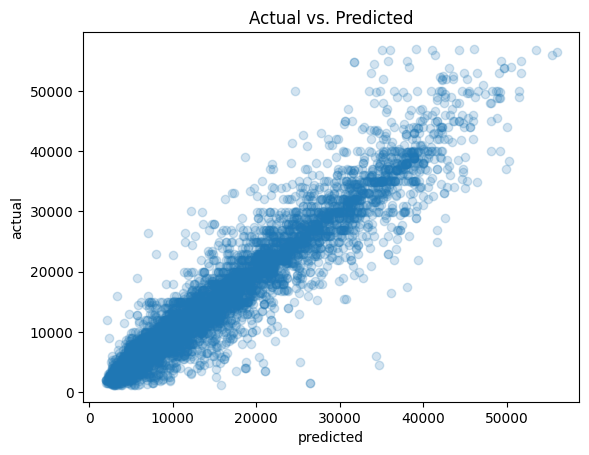

In [39]:
plt.scatter(predicted_prices_forest, y_test, alpha=0.2)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Actual vs. Predicted")